<a href="https://colab.research.google.com/github/jescalada/Tensorflow-colabs/blob/main/neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Networks for classification problems
Used when trying to classify something as one thing or another.
Binary, multiclass, multilabel, etc.

## Create data to view and fit

In [25]:
from sklearn.datasets import make_circles

n_samples = 1000

# Make some circles
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [26]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [27]:
# Visualize the data
import pandas as pd

circles = pd.DataFrame({"x0": x[:,0], "x1": x[:,1], "label": y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


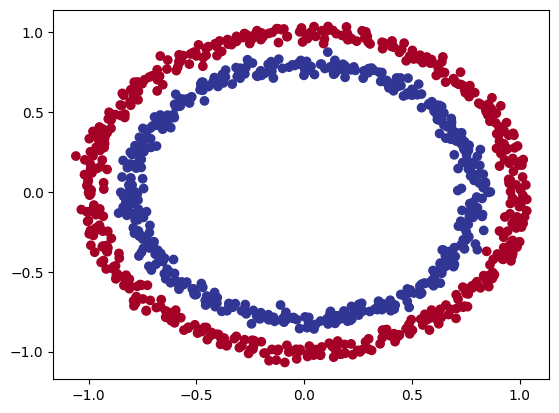

In [28]:
# Plot the data
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

## Steps in modelling

1. Creating the model
2. Compiling the model
3. Fitting the model
4. Evaluate the model
5. Tweak and evaluate (repeatable)

In [47]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 2ms/step - loss: 5.3124 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5545 - accuracy: 0.4980
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8640 - accuracy: 0.4390
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.8198 - accuracy: 0.4540
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7955 - accuracy: 0.4680
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7776 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7636 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7503 - accuracy: 0.4750
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7381 - accuracy: 0.4520
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7272 - accuracy: 0.4530
Epoch 11/

In [41]:
# Create a function to visualize the predictions using a meshgrid

import numpy as np

def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on x.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min = x[:,0].min() - 0.1
  x_max = x[:,0].max() + 0.1
  y_min = x[:,1].min() - 0.1
  y_max = x[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create x values onto which to make predictions
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:,0], x[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

-1.1595024599098636 1.1337117525463374
313/313 [==============================] - 0s 1ms/step


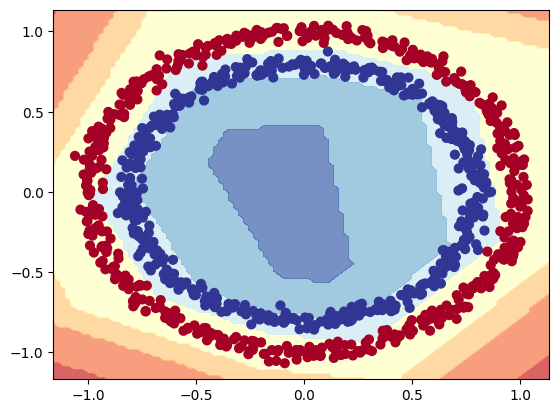

In [48]:
# Check the predictions our model is making
print(x[:,0].min() - 0.1, x[:,0].max() + 0.1)

plot_decision_boundary(model_1, x, y)

In [49]:
x_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

## Finding the best learning rate
The ideal learning rate is the rate in which the loss decreases the most.
We need to use a callback, a modified loss curves plot and another model.